<a href="https://colab.research.google.com/github/faryal-art/Spam_email_classifier/blob/main/SpamEmail_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import libraries

Importing libraries that are required

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import  sklearn
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay,precision_score,recall_score,f1_score
import re




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 2. Load dataset

Loading dataset using pandas and review the dataset and try to understand it

#### 2.1 loading the data

In [84]:
df=pd.read_csv(r"spam.csv", encoding='latin-1')
df.head(20)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


#### 2.2 viewing the information about dataset

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


#### 2.3 droping unwanted columns


In [86]:
df=df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


#### 2.4 Renamig the columns (we are going to work with these 2 colunms )

In [87]:

df=df.rename(columns={'v1': 'label' ,'v2': "text" })
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [88]:
print(df['label'].unique())

['ham' 'spam']


In [89]:
#
df['label'] = df['label'].map({'ham':1, 'spam':0})
df.head(10)

,label,text
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
5,0,FreeMsg Hey there darling it's been 3 week's n...
6,1,Even my brother is not like to speak with me. ...
7,1,As per your request 'Melle Melle (Oru Minnamin...
8,0,WINNER!! As a valued network customer you have...
9,0,Had your mobile 11 months or more? U R entitle...


## Data exploration

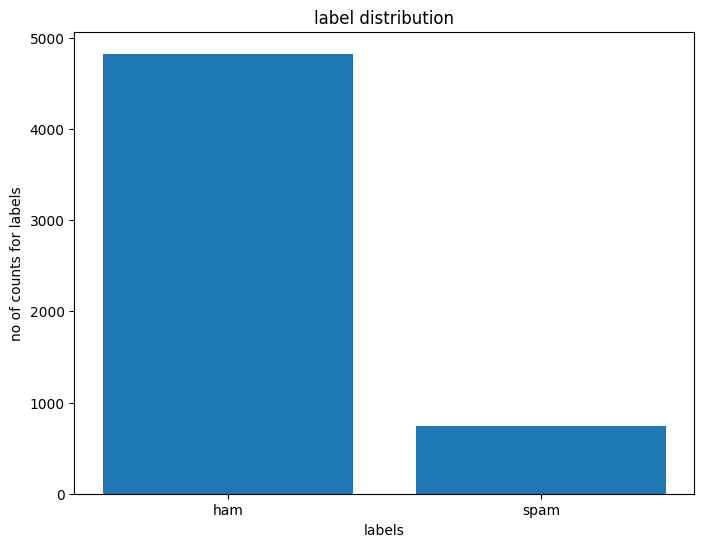

In [90]:
label_counts=df['label'].value_counts()
plt.figure(figsize=(8,6))
classes= ["ham","spam"]
x=classes
y=label_counts.values
plt.bar(x,y, )
plt.xlabel('labels')
plt.ylabel("no of counts for labels")
plt.title("label distribution")
plt.show()





## 3. Data Cleaning and Preprocessing
Goal: Prepare the raw text data for model training.

We are going to use
* `re` (regular expressions) for cleaning text
* `nltk` for natural language processing (tokenization, stopword removal, lemmatization).

Main things we need to do .
1. Remove punctuation ,stopwords and unnecessary characters using re(regular expressions)
2. Convert text to lowercase
3. Tokenizw the text (split into words ) by using `nltk`
4. Apply lemmatization using `nltk`




#### 3.1.  Selecting a sample to test our function (to see if it is working well)

In [91]:
#select random sample from texts to check what our function do.
sample=df['text'][0]
sample

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

### 3.2  Defining the function to clean(preprocess) the text

In [92]:


# Download necessary NLTK resources if not already present
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('punkt', quiet=True)


lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # make sure that all the text is in lower case
    text = text.lower()

    # remove punctuation
    text=re.sub(r'[^a-z\s]', '', text)
    #text = text.translate(str.maketrans('', '', string.punctuation))

    # tokenize the text into list of words
    tokens = word_tokenize(text)

    # remove stopwords and lemmatize
    # Iterate through tokens and lemmatize each word
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]


    # join the tokens back into a string
    return " ".join(cleaned_tokens)

In [93]:
import nltk
nltk.download('punkt_tab')

text=df['text'][2]
print(f'Text before preprocessing :\n {text}')
cleaned=clean_text(text)
print(f"Text after preprocessing :\n{cleaned}")

Text before preprocessing :
 Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
Text after preprocessing :
free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs apply over


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


### 3.3 Cleaning the text
Applying the clean_function which we defined to preprocess and clean out text and create a new column of cleaned text

In [94]:
df['cleaned_text'] = df['text'].apply(clean_text)
display(df.head())

,label,text,cleaned_text
0,1,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,1,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,1,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though


##4. split the dataset into Train and test set
Split the dataset into train and test section


In [95]:
x_train,x_test,y_train,y_test=train_test_split(df["cleaned_text"],df["label"],test_size=0.2,
                                               random_state=42)


#checking the length of our train and test sampels
len(x_train),len(x_test),len(y_train),len(y_test)

(4457, 1115, 4457, 1115)

## 5. Vectorization (Converting Text to Numbers)
Goal: Convert text into a numerical format that models can work with.


Machine Learning models can’t read raw text — they need numbers.

So we must convert each email/message into a numeric vector.

This process is called vectorization (or feature extraction in NLP).
* Use TF-IDF(Term Frequency – Inverse Document Frequency) vectorizer



In [96]:
vectorizer=TfidfVectorizer(max_df=0.9, # Ignore terms that appear in 90% or more of the documents
                           min_df=2, # ignore the terms that appear to fewer(too rare)
                           ngram_range=(1,2) # Use bot single words and pair of words
                           )
x_train_vec=vectorizer.fit_transform(x_train)
x_test_vec=vectorizer.transform(x_test)


## 6. . Model Building — Binary Classification
Goal: Build a model that classifies each email as spam or ham (not spam).

Trying different models and then choose the best one based on their performance

- Multinomial Naive Bayes (recommended for text)
- Logistic Regression
- Support Vector Machine (SVM)

In [97]:
# as we have to try multiple models we keep them in dictionary and  loop over them
models={
    "NaiveBayes":MultinomialNB(),
    "logisticRegression": LogisticRegression(),
    "SVM": SVC()
}
results={
    "Model": [],
    "Accuracy": [],
    "Presision": [],
    "Recall": [],
    "F1": []
}

for name,model in models.items():
  model.fit(x_train_vec,y_train) # Train the model using y_train
  predictions=model.predict(x_test_vec) # predictions
  acc=accuracy_score(y_test,predictions) # accuracy calculation
  pre=precision_score(y_test,predictions) #precision calculation
  rec=recall_score(y_test,predictions)
  f1=f1_score(y_test,predictions)
  # appending the above calculations into  epmty results  dictionary
  results["Model"].append(name)
  results["Accuracy"].append(acc)
  results["Presision"].append(pre)
  results["Recall"].append(rec)
  results["F1"].append(f1)
  print(f'{name}')
  print(f"Accuracy : {acc:.4f}")
  print(f"Precision: {pre:.4f}" )
  print(f"Recall: {rec:.4f}")
  print(f" F1 Score: {f1:.4f}")
  print(classification_report(y_test,predictions))
  print(confusion_matrix(y_test,predictions))
  print("-----------")

NaiveBayes
Accuracy : 0.9659
Precision: 0.9621
Recall: 1.0000
 F1 Score: 0.9807
              precision    recall  f1-score   support

           0       1.00      0.75      0.85       150
           1       0.96      1.00      0.98       965

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.92      1115
weighted avg       0.97      0.97      0.96      1115

[[112  38]
 [  0 965]]
-----------
logisticRegression
Accuracy : 0.9552
Precision: 0.9525
Recall: 0.9979
 F1 Score: 0.9747
              precision    recall  f1-score   support

           0       0.98      0.68      0.80       150
           1       0.95      1.00      0.97       965

    accuracy                           0.96      1115
   macro avg       0.97      0.84      0.89      1115
weighted avg       0.96      0.96      0.95      1115

[[102  48]
 [  2 963]]
-----------
SVM
Accuracy : 0.9776
Precision: 0.9757
Recall: 0.9990
 F1 Score: 0.9872
              precision    recall  

### 7. Model Evaluation
Goal: Understand how well your model is performing.
Evaluation Metrics:
- Accuracy
- Precision
- Recall
- F1-Score
- Confusion Matrix


Evaluate the model based on these metrics and choose the best one

In [98]:
results_df = pd.DataFrame(results) # creates a dataframe for results dictinary ehich make access easier
best_model_row = results_df.loc[results_df['Accuracy'].idxmax()] #Get the row which contain the model with higher accuracy
best_model_name = best_model_row['Model'] # from row we select the model name
best_model_accuracy = best_model_row['Accuracy']

print(f"Best Model : {best_model_name} , Accuracy: {best_model_accuracy:.4f}")

#displaying the full results table
display(results_df)

Best Model : SVM , Accuracy: 0.9776


,Model,Accuracy,Presision,Recall,F1
0,NaiveBayes,0.965919,0.962114,1.000000,0.980691
1,logisticRegression,0.955157,0.952522,0.997927,0.974696
2,SVM,0.977578,0.975709,0.998964,0.987199


## 8. Save the Model & Vectorizer


In [124]:
import joblib
# Save the actual best model object, not just its name
joblib.dump(models[best_model_name],"spam_detection_model.pkl")
joblib.dump(vectorizer,"vectorizer.pkl")
print("Model and vectorizer is saved")

Model and vectorizer is saved


In [128]:
# we can load model like this if we need it in future
model2=joblib.load("spam_detection_model.pkl")
vectorizer2=joblib.load("vectorizer.pkl")

# test the saved model
sample= ["Congratulations! You have won a free iPhone. Claim now!!!"]
sample_t=clean_text(sample[0])
sample_vec=vectorizer2.transform([sample_t])
pre=model2.predict(sample_vec)[0]
if pre==0:
  print(f"model prediction: Spam")
else:
  print(f"model prediction: Ham")

model prediction: Spam


## 9. Test model on New Emails

Try predicting on new unseen messages:
* take new unseen emsil text
* clean and preprocess it
* perform vectorization
* Make predictions using the best model with highest accuracy

In [101]:
# sample text for prediction
sample_text=["Congratulations! You won a free prize, claim now!!!"]


In [110]:
# defining a function to test our model on random sample
def email_predict(text):
  ''' Predict wether an email is spam or not
  Take 1 parameter : email text
   '''
  clean=clean_text(text) #clean the text
  text_vec=vectorizer.transform([clean]) # Pass the cleaned text as a list
  prediction=models[best_model_name].predict(text_vec) #make prediction on text
  return "Spam" if prediction==0 else "Ham"

In [120]:
sample_text=["Congratulations! You won a free prize, claim now!!!"]

print(f"Custom email text for prediction: \n{sample_text[0]}")
print(f"Prediction made by mdel: {email_predict(sample_text[0])}")

#can take input a message as well and then make prediction on it
input_text=input("Enter your email text:")
print(f"Prediction made by model : {email_predict(input_text[0])}")

Custom email text for prediction: 
Congratulations! You won a free prize, claim now!!!
Prediction made by mdel: Spam
Enter your email text:"Let’s meet for lunch at 1 pm in the cafeteria."
Prediction made by model : Ham


## 10. Confusion metric
To see how your model performs on Spam vs Ham classification.

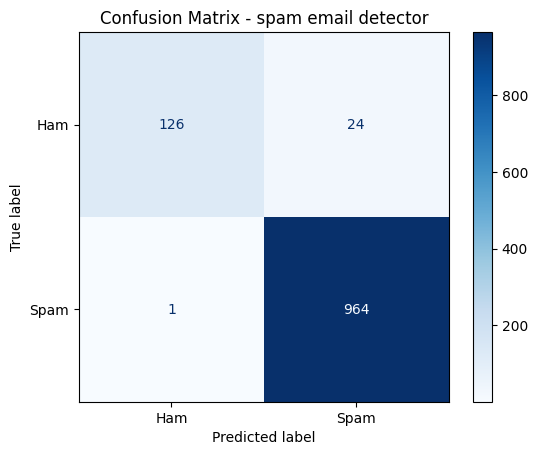

In [132]:
pred=models[best_model_name].predict(x_test_vec)
cm=confusion_matrix(y_test,pred,labels=[0,1])
dis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Ham","Spam"])
dis.plot(cmap="Blues")
plt.title("Confusion Matrix - spam email detector")
plt.show()